In [ ]:
# AutoGluon Text 분석
# https://auto.gluon.ai/stable/tutorials/multimodal/text_prediction/beginner_text.html#sentiment-analysis-task

# Hyperparmeter 최적화
# https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html

In [ ]:
!pip3 install -U pip
!pip3 install -U setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install torch==1.13.1+cpu torchvision==0.14.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
!pip3 install torch==1.13.1+cu116 torchvision==0.14.1+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
  Using cached https://download.pytorch.org/whl/cpu/torch-1.13.1%2Bcpu-cp38-cp38-linux_x86_64.whl (199.1 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.14.1%2Bcpu-cp38-cp38-linux_x86_64.whl (16.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
  Using cached https://download.pytorch.org/whl/cu116/torch-1.13.1%2Bcu116-cp38-cp38-linux_x86_64.whl (1

In [ ]:
!pip3 install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/ML-Olympiad/Detect-ChatGpt-answers/"

train = pd.read_csv(PATH+'data/train.csv')
test = pd.read_csv(PATH+'data/test.csv')
submission = pd.read_csv(PATH+'data/sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train

ID                                          prompt  \
0    690.0                       What is the future of AI?   
1    304.0  What is your biggest challenge in your career?   
2     63.0      What is the tallest mountain in the world?   
3    894.0                 What are the best 5 super cars?   
4    796.0                          What is deep learning?   
..     ...                                             ...   
743  283.0   What is the most important thing in a family?   
744  895.0      What are the best machine learning Models?   
745  963.0           How can I chop onions without crying?   
746  156.0           What is the best way to stay healthy?   
747  593.0               Do you think Naruto is overrated?   

                                                answer   AI  
0    The future of Artificial Intelligence (AI) is ...  1.0  
1    My biggest challenge in my career is balancing...  0.0  
2    The tallest mountain in the world is Mount Eve...  1.0  
3    McLaren 720S.\r\nFerrari 296 GTB.\r\nAudi R8.\...  0.0  
4    a type of machine learning based on artificial...  0.0  
..                                                 ...  ...  
743  The most important thing in a family for me is...  0.0  
744  Linear regression.\r\nLogistic regression\r\nD...  0.0  
745  The best thing to do is very simple: use a ver...  0.0  
746  The best way to stay healthy varies from perso...  0.0  
747  I think Naruto is a well-received anime with a...  1.0  

[748 rows x 4 columns]

## 1. 전처리

In [ ]:
train["prompt"].isna().sum()

0

In [ ]:

# train = train[train["prompt"].isna()==False]

In [ ]:
train["answer"].isna().sum()

1

In [ ]:
train = train[train["answer"].isna()==False]

In [ ]:
train["AI"].isna().sum()

1

In [ ]:
train = train[train["AI"].isna()==False]

In [ ]:
test.isna().sum()

ID        0
prompt    0
answer    0
dtype: int64

In [ ]:
train

ID                                          prompt  \
0    690.0                       What is the future of AI?   
1    304.0  What is your biggest challenge in your career?   
2     63.0      What is the tallest mountain in the world?   
3    894.0                 What are the best 5 super cars?   
4    796.0                          What is deep learning?   
..     ...                                             ...   
743  283.0   What is the most important thing in a family?   
744  895.0      What are the best machine learning Models?   
745  963.0           How can I chop onions without crying?   
746  156.0           What is the best way to stay healthy?   
747  593.0               Do you think Naruto is overrated?   

                                                answer   AI  
0    The future of Artificial Intelligence (AI) is ...  1.0  
1    My biggest challenge in my career is balancing...  0.0  
2    The tallest mountain in the world is Mount Eve...  1.0  
3    McLaren 720S.\r\nFerrari 296 GTB.\r\nAudi R8.\...  0.0  
4    a type of machine learning based on artificial...  0.0  
..                                                 ...  ...  
743  The most important thing in a family for me is...  0.0  
744  Linear regression.\r\nLogistic regression\r\nD...  0.0  
745  The best thing to do is very simple: use a ver...  0.0  
746  The best way to stay healthy varies from perso...  0.0  
747  I think Naruto is a well-received anime with a...  1.0  

[746 rows x 4 columns]

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train['AI'].value_counts()

0.0    539
1.0    207
Name: AI, dtype: int64

<AxesSubplot:xlabel='AI', ylabel='count'>

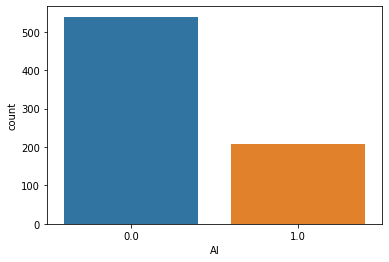

In [ ]:
import seaborn as sns
sns.color_palette("pastel", 10)
sns.countplot(x='AI', data=train)

### 특수문자 확인

In [ ]:
import matplotlib.pyplot as plt
import re

In [ ]:
train['sign'] = train['answer'].str.replace(pat=r'[\w]', repl=r'', regex=True) # \w -> 특수문자만
test['sign'] = test['answer'].str.replace(pat=r'[\w]', repl=r'', regex=True) # \w -> 특수문자만

In [ ]:
train['sign'] = train['sign'].str.replace(pat=r'[ ]+', repl=r'', regex=True)
test['sign'] = test['sign'].str.replace(pat=r'[ ]+', repl=r'', regex=True)
train['sign'] = train['sign'].str.replace(pat=r'[,|.|\n|\r|\t]', repl=r'', regex=True)
test['sign'] = test['sign'].str.replace(pat=r'[,|.|\n|\r|\t]', repl=r'', regex=True)

In [ ]:
train['sign'].str.strip()[0]

"()'"

In [ ]:
len(train['sign'].str.strip()[0])

3

In [ ]:
train['sign_count'] = train['sign'].apply(lambda x: len(x))
test['sign_count'] = test['sign'].apply(lambda x: len(x))

In [ ]:
train[['sign_count']].describe()

sign_count
count  746.000000
mean     1.128686
std      2.828818
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     28.000000

In [ ]:
train[train['AI']==0][['sign_count']].describe()

sign_count
count  539.000000
mean     1.051948
std      2.741172
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     28.000000

In [ ]:
train[train['AI']==1][['sign_count']].describe() # AI가 사용률이 조금 많음

sign_count
count  207.000000
mean     1.328502
std      3.043106
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     18.000000

In [ ]:
import numpy as np

텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 28
텍스트의 평균 길이 : 1.128686327077748


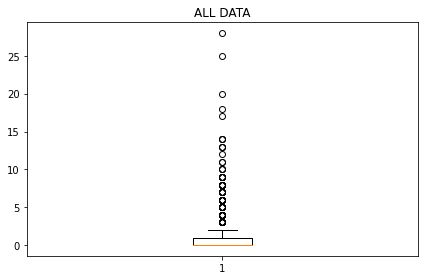

In [ ]:
print('텍스트의 최소 길이 : {}'.format(np.min(train['sign_count'])))
print('텍스트의 최대 길이 : {}'.format(np.max(train['sign_count'])))
print('텍스트의 평균 길이 : {}'.format(np.mean(train['sign_count'])))

plt.boxplot(train['sign_count'])
plt.title('ALL DATA')
plt.tight_layout()
plt.show()

텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 28
텍스트의 평균 길이 : 1.051948051948052


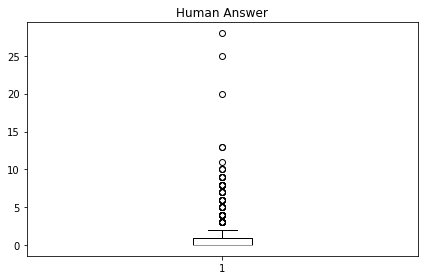

In [ ]:
print('텍스트의 최소 길이 : {}'.format(np.min(train[train['AI']==0]['sign_count'])))
print('텍스트의 최대 길이 : {}'.format(np.max(train[train['AI']==0]['sign_count'])))
print('텍스트의 평균 길이 : {}'.format(np.mean(train[train['AI']==0]['sign_count'])))

plt.boxplot(train[train['AI']==0]['sign_count'])
plt.title('Human Answer')
plt.tight_layout()
plt.show()

텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 18
텍스트의 평균 길이 : 1.328502415458937


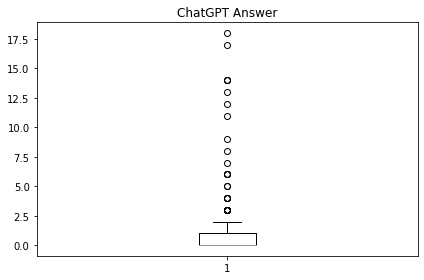

In [ ]:
print('텍스트의 최소 길이 : {}'.format(np.min(train[train['AI']==1]['sign_count'])))
print('텍스트의 최대 길이 : {}'.format(np.max(train[train['AI']==1]['sign_count'])))
print('텍스트의 평균 길이 : {}'.format(np.mean(train[train['AI']==1]['sign_count'])))

plt.boxplot(train[train['AI']==1]['sign_count'])
plt.title('ChatGPT Answer')
plt.tight_layout()
plt.show()

In [ ]:
# ?와 !표 확인


In [ ]:
train_tmp = train.copy()

In [ ]:
re.findall(train['sign'][0], train['sign'][0])

['']

In [ ]:
len(re.findall(train['sign'][0], train['sign'][0]))

1

In [ ]:
train_tmp['q_mark'] = train['sign'].apply(lambda x: len(re.findall('\?', x))

In [ ]:
train_tmp['ex_mark'] = train['sign'].apply(lambda x: len(re.findall('\!', x)))

In [ ]:
train_tmp[train_tmp['q_mark'] != 0]['AI'].value_counts() # ?는 사람만 사용

0.0    3
Name: AI, dtype: int64

In [ ]:
train_tmp[train_tmp['ex_mark'] != 0]['AI'].value_counts() # !표는 AI도 사용하지만 사람이 더 많이 사용

0.0    5
1.0    2
Name: AI, dtype: int64

In [ ]:
train_tmp[train_tmp['AI']==1][['q_mark']].describe()

q_mark
count   207.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

In [ ]:
train_tmp[train_tmp['AI']==1][['q_mark']].describe()

q_mark
count   207.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

In [ ]:
import numpy as np

In [ ]:
import re
import emoji
from unidecode import unidecode

#remove html tags
def removeHTML(x):
    html=re.compile(r'<.*?>')
    return html.sub(r'',x)
    
#remove emoji and symbols
def dataPreprocessing(x): 
    x = x.lower()
    x = removeHTML(x)
    x = emoji.demojize(x, delimiters=(" ", " "))
    x = re.sub("'re", ' are',x) # 're n't --> are not 
    x = re.sub("n't", ' not',x) # 're n't --> are not 
    x = re.sub(r'[^A-Za-z0-9!.?, ]', '', x) 
    x = re.sub(r'[!.?]','/n',x)
    x = re.sub(r'[,]',' ',x)

    # x = re.sub("@\w+", '',x) # removing mentions (@)
    # x = re.sub("'\d+", '',x)
    # x = re.sub("\d+", '',x)
    # x = re.sub(r"[^\w\s]", '',x) # to remove symbols
    # x = re.sub("http\w+", '',x)
    # x = re.sub("\s[a-z]\s", '',x)
    x = re.sub("[\n|\r]",' ',x) # index 3번 \r, \n 삭제
    x = re.sub("[ ]+",' ',x) # space*n --> space
    x = re.sub("_",'',x) # _people_ --> people
    x = x.strip()
    return unidecode(x) #emily bronté --> emily bronte, mi² --> mi2, πr --> pr

In [ ]:
train_text = train.copy()
train_text["prompt"]=train["prompt"].apply(lambda x: dataPreprocessing(x))
train_text["answer"]=train["answer"].apply(lambda x: dataPreprocessing(x))

In [ ]:
test_text = test.copy()
test_text["prompt"]=test["prompt"].apply(lambda x: dataPreprocessing(x))
test_text["answer"]=test["answer"].apply(lambda x: dataPreprocessing(x))

In [ ]:
train_text

ID                                           prompt  \
0    690.0                       what is the future of ai/n   
1    304.0  what is your biggest challenge in your career/n   
2     63.0      what is the tallest mountain in the world/n   
3    894.0                 what are the best 5 super cars/n   
4    796.0                          what is deep learning/n   
..     ...                                              ...   
743  283.0   what is the most important thing in a family/n   
744  895.0      what are the best machine learning models/n   
745  963.0           how can i chop onions without crying/n   
746  156.0           what is the best way to stay healthy/n   
747  593.0               do you think naruto is overrated/n   

                                                answer   AI sign  sign_count  
0    the future of artificial intelligence ai is bo...  1.0  ()'           3  
1    my biggest challenge in my career is balancing...  0.0                0  
2    the tallest mountain in the world is mount eve...  1.0   ()           2  
3    mclaren 720s/nferrari 296 gtb/naudi r8/nmasera...  0.0                0  
4    a type of machine learning based on artificial...  0.0                0  
..                                                 ...  ...  ...         ...  
743  the most important thing in a family for me is...  0.0                0  
744  linear regression/nlogistic regressiondecision...  0.0   ()           2  
745  the best thing to do is very simple use a very...  0.0  :""           3  
746  the best way to stay healthy varies from perso...  0.0                0  
747  i think naruto is a wellreceived anime with a ...  1.0    -           1  

[746 rows x 6 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X = train_text.drop(['ID'], axis=1)
y = train['AI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pd.DataFrame(X_train, columns=['prompt', 'answer', 'sign', 'sign_count'])

prompt  \
70   what is the name of the unit used to measure p...   
164  what is the name of the largest underwater cav...   
712  what is the name of the gas that makes up the ...   
265  what is the name of the largest underwater cav...   
250  what is the most important factor in making a ...   
..                                                 ...   
71                     what is your biggest strength/n   
106                what is the currency of australia/n   
270            what is the best way to stay positive/n   
435  what is the name of the largest underwater cav...   
102  what is your opinion on the current state of a...   

                                                answer sign  sign_count  
70        the unit used to measure power is the watt/n                0  
164                              sac actun cave system                0  
712  the gas that makes up the majority of the eart...    '           1  
265  after doing a lot of research i found that sac...                0  
250  the most important factor in making a decision...                0  
..                                                 ...  ...         ...  
71   my biggest strength is my ability to communica...                0  
106                                australian dollar/n                0  
270  the best way to stay positive in my opinion is...                0  
435                              sac actun cave system                0  
102  ai technology has advanced significantly in re...                0  

[596 rows x 4 columns]

In [ ]:
pd.DataFrame(y_train, columns=['AI'])

AI
70   1.0
164  0.0
712  0.0
265  0.0
250  0.0
..   ...
71   0.0
106  0.0
270  0.0
435  0.0
102  1.0

[596 rows x 1 columns]

In [ ]:
train_data = pd.concat([pd.DataFrame(X_train, columns=['prompt', 'answer', 'sign', 'sign_count']), pd.DataFrame(y_train, columns=['AI'])], axis=1)
train_data

prompt  \
70   what is the name of the unit used to measure p...   
164  what is the name of the largest underwater cav...   
712  what is the name of the gas that makes up the ...   
265  what is the name of the largest underwater cav...   
250  what is the most important factor in making a ...   
..                                                 ...   
71                     what is your biggest strength/n   
106                what is the currency of australia/n   
270            what is the best way to stay positive/n   
435  what is the name of the largest underwater cav...   
102  what is your opinion on the current state of a...   

                                                answer sign  sign_count   AI  
70        the unit used to measure power is the watt/n                0  1.0  
164                              sac actun cave system                0  0.0  
712  the gas that makes up the majority of the eart...    '           1  0.0  
265  after doing a lot of research i found that sac...                0  0.0  
250  the most important factor in making a decision...                0  0.0  
..                                                 ...  ...         ...  ...  
71   my biggest strength is my ability to communica...                0  0.0  
106                                australian dollar/n                0  0.0  
270  the best way to stay positive in my opinion is...                0  0.0  
435                              sac actun cave system                0  0.0  
102  ai technology has advanced significantly in re...                0  1.0  

[596 rows x 5 columns]

In [ ]:
test_data = pd.concat([pd.DataFrame(X_test, columns=['prompt', 'answer', 'sign', 'sign_count']), pd.DataFrame(y_test, columns=['AI'])], axis=1)
test_data

prompt  \
208  what is the most important lesson you have lea...   
259           what is your biggest challenge in life/n   
97                   where to put code documentation/n   
148  what is the key to success in the culinary arts/n   
395  what is your take on the current state of the ...   
..                                                 ...   
554           what is the best way to stay organized/n   
69   what is the name of the largest living structu...   
522                      what is the meaning of life/n   
131          what is natural language processing nlp/n   
44   what is the name of the largest freshwater lak...   

                                                answer           sign  \
208  the most important lesson i have learned in li...              '   
259  my biggest challenge in life is balancing my w...                  
97   some use other systems take a look at pythons ...  -'--(/++)''()   
148  the key to success in the culinary arts is cre...                  
395  the current state of the world is complex and ...                  
..                                                 ...            ...   
554  the best way to stay organized varies from per...              -   
69   the largest living structure in the world is t...                  
522  the meaning of life is subjective and can vary...                  
131  nlp is an interdisciplinary subfield of lingui...                  
44   the largest freshwater lake in the world is la...                  

     sign_count   AI  
208           1  0.0  
259           0  0.0  
97           13  0.0  
148           0  0.0  
395           0  1.0  
..          ...  ...  
554           1  0.0  
69            0  1.0  
522           0  0.0  
131           0  0.0  
44            0  1.0  

[150 rows x 5 columns]

## 2. 모델링

In [ ]:
label = 'AI'
eval_metric = 'acc'
time_limit = 3600 * 8

In [ ]:
from ray import tune

In [ ]:
hyperparameters = {
        # "optimization.learning_rate": tune.uniform(0.00005, 0.005),
        # "optimization.optim_type": tune.choice(["adamw", "sgd"]),
        # "optimization.max_epochs": tune.choice(["40", "50"]),
        # "model.timm_image.checkpoint_name": tune.choice(["swin_base_patch4_window7_224", "convnext_base_in22ft1k"])
}
hyperparameter_tune_kwargs = {
    # "searcher": "bayes", # random
    # "scheduler": "ASHA",
    # "num_trials": 2,
}

In [ ]:
from autogluon.multimodal import MultiModalPredictor
# 모듈 못찾는 Attribute Error 발생시 런타임 초기화 후 코드 처음부터 재실행
# EX. AttributeError: module 'PIL.Image' has no attribute 'Resampling'
import uuid

# model_path = PATH+f"model/{uuid.uuid4().hex}-automm_sst_QA_sign_8hours" # 모델 구글 드라이브에 저장 안하도록(용량 초과 가능)
# predictor = MultiModalPredictor(label=label, eval_metric=eval_metric, path=model_path) # 모델 구글 드라이브에 저장 안하도록(용량 초과 가능)
predictor = MultiModalPredictor(label=label, eval_metric=eval_metric)
predictor.fit(train_data, presets='best_quality', 
              hyperparameters={"optimization.max_epochs": 1000, "optimization.patience": 500},
              time_limit=time_limit)

INFO:lightning_fabric.utilities.seed:Global seed set to 123
No path specified. Models will be saved in: "AutogluonModels/ag-20230305_132502/"
AutoMM starts to create your model. ✨

- Model will be saved to "/content/AutogluonModels/ag-20230305_132502".

- Validation metric is "acc".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/AutogluonModels/ag-20230305_132502
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai



/usr/local/lib/python3.8/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit None Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1: 'val_acc' reached 0.24167 (best 0.24167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=0-step=1.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 4: 'val_acc' reached 0.24167 (best 0.24167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=0-step=4.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 5: 'val_acc' reached 0.24167 (best 0.24167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=1-step=5.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 8: 'val_acc' reached 0.29167 (best 0.29167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=1-step=8.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 9: 'val_acc' reached 0.57500 (best 0.57500), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=2-step=9.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 12: 'val_acc' reached 0.75833 (best 0.75833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=2-step=12.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 13: 'val_acc' reached 0.75833 (best 0.75833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=3-step=13.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 16: 'val_acc' reached 0.75833 (best 0.75833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=3-step=16.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 17: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 20: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 21: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 24: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 25: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 28: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 29: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 32: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 33: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 36: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 37: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 40: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 41: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 44: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 45: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 48: 'val_acc' reached 0.76667 (best 0.76667), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=11-step=48.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 49: 'val_acc' reached 0.76667 (best 0.76667), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=12-step=49.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 52: 'val_acc' reached 0.78333 (best 0.78333), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=12-step=52.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 53: 'val_acc' reached 0.79167 (best 0.79167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=13-step=53.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 56: 'val_acc' reached 0.80000 (best 0.80000), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=13-step=56.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 57: 'val_acc' reached 0.82500 (best 0.82500), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=14-step=57.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 60: 'val_acc' reached 0.88333 (best 0.88333), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=14-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 61: 'val_acc' reached 0.90000 (best 0.90000), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=15-step=61.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 64: 'val_acc' reached 0.87500 (best 0.90000), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=15-step=64.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 65: 'val_acc' reached 0.90833 (best 0.90833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=16-step=65.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 68: 'val_acc' reached 0.89167 (best 0.90833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=16-step=68.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 69: 'val_acc' reached 0.90000 (best 0.90833), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=17-step=69.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 72: 'val_acc' reached 0.92500 (best 0.92500), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=17-step=72.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 73: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 76: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 77: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 80: 'val_acc' reached 0.92500 (best 0.92500), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=19-step=80.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 81: 'val_acc' reached 0.92500 (best 0.92500), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=20-step=81.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 84: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 85: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 88: 'val_acc' reached 0.94167 (best 0.94167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=21-step=88.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 89: 'val_acc' reached 0.94167 (best 0.94167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=22-step=89.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 92: 'val_acc' reached 0.94167 (best 0.94167), saving model to '/content/AutogluonModels/ag-20230305_132502/epoch=22-step=92.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 93: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 96: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 97: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 100: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 25, global step 101: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 25, global step 104: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 26, global step 105: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 26, global step 108: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 27, global step 109: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 27, global step 112: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 28, global step 113: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 28, global step 116: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 117: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 120: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 30, global step 121: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 30, global step 124: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 31, global step 125: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 31, global step 128: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 32, global step 129: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 32, global step 132: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 33, global step 133: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 33, global step 136: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 34, global step 137: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 34, global step 140: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 35, global step 141: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 35, global step 144: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 36, global step 145: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 36, global step 148: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 37, global step 149: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 37, global step 152: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 38, global step 153: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 38, global step 156: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 157: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 160: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 40, global step 161: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 40, global step 164: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 41, global step 165: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 41, global step 168: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 42, global step 169: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 42, global step 172: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 43, global step 173: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 43, global step 176: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 44, global step 177: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 44, global step 180: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 45, global step 181: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 45, global step 184: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 46, global step 185: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 46, global step 188: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 47, global step 189: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 47, global step 192: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 48, global step 193: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 48, global step 196: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 197: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 200: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 50, global step 201: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 50, global step 204: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 51, global step 205: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 51, global step 208: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 52, global step 209: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 52, global step 212: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 53, global step 213: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 53, global step 216: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 54, global step 217: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 54, global step 220: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 55, global step 221: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 55, global step 224: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 56, global step 225: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 56, global step 228: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 57, global step 229: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 57, global step 232: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 58, global step 233: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 58, global step 236: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 237: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 240: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 60, global step 241: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 60, global step 244: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 61, global step 245: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 61, global step 248: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 62, global step 249: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 62, global step 252: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 63, global step 253: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 63, global step 256: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 64, global step 257: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 64, global step 260: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 65, global step 261: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 65, global step 264: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 66, global step 265: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 66, global step 268: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 67, global step 269: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 67, global step 272: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 68, global step 273: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 68, global step 276: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 69, global step 277: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 69, global step 280: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 70, global step 281: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 70, global step 284: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 71, global step 285: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 71, global step 288: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 72, global step 289: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 72, global step 292: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 73, global step 293: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 73, global step 296: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 74, global step 297: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 74, global step 300: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 75, global step 301: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 75, global step 304: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 76, global step 305: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 76, global step 308: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 77, global step 309: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 77, global step 312: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 78, global step 313: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 78, global step 316: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 79, global step 317: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 79, global step 320: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 80, global step 321: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 80, global step 324: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 81, global step 325: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 81, global step 328: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 82, global step 329: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 82, global step 332: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 83, global step 333: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 83, global step 336: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 84, global step 337: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 84, global step 340: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 85, global step 341: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 85, global step 344: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 86, global step 345: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 86, global step 348: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 87, global step 349: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 87, global step 352: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 88, global step 353: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 88, global step 356: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 89, global step 357: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 89, global step 360: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 90, global step 361: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 90, global step 364: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 91, global step 365: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 91, global step 368: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 92, global step 369: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 92, global step 372: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 93, global step 373: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 93, global step 376: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 94, global step 377: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 94, global step 380: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 95, global step 381: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 95, global step 384: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 96, global step 385: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 96, global step 388: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 97, global step 389: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 97, global step 392: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 98, global step 393: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 98, global step 396: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 99, global step 397: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 99, global step 400: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 100, global step 401: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 100, global step 404: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 101, global step 405: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 101, global step 408: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 102, global step 409: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 102, global step 412: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 103, global step 413: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 103, global step 416: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 104, global step 417: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 104, global step 420: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 105, global step 421: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 105, global step 424: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 106, global step 425: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 106, global step 428: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 107, global step 429: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 107, global step 432: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 108, global step 433: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 108, global step 436: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 109, global step 437: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 109, global step 440: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 110, global step 441: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 110, global step 444: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 111, global step 445: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 111, global step 448: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 112, global step 449: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 112, global step 452: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 113, global step 453: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 113, global step 456: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 114, global step 457: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 114, global step 460: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 115, global step 461: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 115, global step 464: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 116, global step 465: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 116, global step 468: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 117, global step 469: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 117, global step 472: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 118, global step 473: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 118, global step 476: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 119, global step 477: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 119, global step 480: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 120, global step 481: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 120, global step 484: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 121, global step 485: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 121, global step 488: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 122, global step 489: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 122, global step 492: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 123, global step 493: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 123, global step 496: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 124, global step 497: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 124, global step 500: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 125, global step 501: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 125, global step 504: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 126, global step 505: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 126, global step 508: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 127, global step 509: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 127, global step 512: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 128, global step 513: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 128, global step 516: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 129, global step 517: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 129, global step 520: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 130, global step 521: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 130, global step 524: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 131, global step 525: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 131, global step 528: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 132, global step 529: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 132, global step 532: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 133, global step 533: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 133, global step 536: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 134, global step 537: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 134, global step 540: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 135, global step 541: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 135, global step 544: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 136, global step 545: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 136, global step 548: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 137, global step 549: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 137, global step 552: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 138, global step 553: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 138, global step 556: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 139, global step 557: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 139, global step 560: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 140, global step 561: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 140, global step 564: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 141, global step 565: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 141, global step 568: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 142, global step 569: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 142, global step 572: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 143, global step 573: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 143, global step 576: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 144, global step 577: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 144, global step 580: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 145, global step 581: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 145, global step 584: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 146, global step 585: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 146, global step 588: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 147, global step 589: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 147, global step 592: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 148, global step 593: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 148, global step 596: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 149, global step 597: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 149, global step 600: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 150, global step 601: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 150, global step 604: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 151, global step 605: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 151, global step 608: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 152, global step 609: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 152, global step 612: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 153, global step 613: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 153, global step 616: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 154, global step 617: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 154, global step 620: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 155, global step 621: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 155, global step 624: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 156, global step 625: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 156, global step 628: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 157, global step 629: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 157, global step 632: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 158, global step 633: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 158, global step 636: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 159, global step 637: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 159, global step 640: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 160, global step 641: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 160, global step 644: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 161, global step 645: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 161, global step 648: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 162, global step 649: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 162, global step 652: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 163, global step 653: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 163, global step 656: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 164, global step 657: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 164, global step 660: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 165, global step 661: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 165, global step 664: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 166, global step 665: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 166, global step 668: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 167, global step 669: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 167, global step 672: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 168, global step 673: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 168, global step 676: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 169, global step 677: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 169, global step 680: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 170, global step 681: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 170, global step 684: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 171, global step 685: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 171, global step 688: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 172, global step 689: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 172, global step 692: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 173, global step 693: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 173, global step 696: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 174, global step 697: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 174, global step 700: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 175, global step 701: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 175, global step 704: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 176, global step 705: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 176, global step 708: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 177, global step 709: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 177, global step 712: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 178, global step 713: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 178, global step 716: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 179, global step 717: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 179, global step 720: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 180, global step 721: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 180, global step 724: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 181, global step 725: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 181, global step 728: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 182, global step 729: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 182, global step 732: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 183, global step 733: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 183, global step 736: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 184, global step 737: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 184, global step 740: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 185, global step 741: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 185, global step 744: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 186, global step 745: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 186, global step 748: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 187, global step 749: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 187, global step 752: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 188, global step 753: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 188, global step 756: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 189, global step 757: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 189, global step 760: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 190, global step 761: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 190, global step 764: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 191, global step 765: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 191, global step 768: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 192, global step 769: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 192, global step 772: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 193, global step 773: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 193, global step 776: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 194, global step 777: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 194, global step 780: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 195, global step 781: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 195, global step 784: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 196, global step 785: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 196, global step 788: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 197, global step 789: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 197, global step 792: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 198, global step 793: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 198, global step 796: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 199, global step 797: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 199, global step 800: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 200, global step 801: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 200, global step 804: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 201, global step 805: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 201, global step 808: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 202, global step 809: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 202, global step 812: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 203, global step 813: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 203, global step 816: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 204, global step 817: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 204, global step 820: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 205, global step 821: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 205, global step 824: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 206, global step 825: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 206, global step 828: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 207, global step 829: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 207, global step 832: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 208, global step 833: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 208, global step 836: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 209, global step 837: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 209, global step 840: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 210, global step 841: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 210, global step 844: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 211, global step 845: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 211, global step 848: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 212, global step 849: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 212, global step 852: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 213, global step 853: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 213, global step 856: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 214, global step 857: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 214, global step 860: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 215, global step 861: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 215, global step 864: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 216, global step 865: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 216, global step 868: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 217, global step 869: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 217, global step 872: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 218, global step 873: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 218, global step 876: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 219, global step 877: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 219, global step 880: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 220, global step 881: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 220, global step 884: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 221, global step 885: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 221, global step 888: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 222, global step 889: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 222, global step 892: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 223, global step 893: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 223, global step 896: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 224, global step 897: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 224, global step 900: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 225, global step 901: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 225, global step 904: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 226, global step 905: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 226, global step 908: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 227, global step 909: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 227, global step 912: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 228, global step 913: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 228, global step 916: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 229, global step 917: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 229, global step 920: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 230, global step 921: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 230, global step 924: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 231, global step 925: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 231, global step 928: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 232, global step 929: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 232, global step 932: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 233, global step 933: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 233, global step 936: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 234, global step 937: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 234, global step 940: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 235, global step 941: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 235, global step 944: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 236, global step 945: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 236, global step 948: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 237, global step 949: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 237, global step 952: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 238, global step 953: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 238, global step 956: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 239, global step 957: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 239, global step 960: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 240, global step 961: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 240, global step 964: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 241, global step 965: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 241, global step 968: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 242, global step 969: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 242, global step 972: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 243, global step 973: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 243, global step 976: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 244, global step 977: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 244, global step 980: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 245, global step 981: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 245, global step 984: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 246, global step 985: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 246, global step 988: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 247, global step 989: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 247, global step 992: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 248, global step 993: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 248, global step 996: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 249, global step 997: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 249, global step 1000: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 250, global step 1001: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 250, global step 1004: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 251, global step 1005: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 251, global step 1008: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 252, global step 1009: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 252, global step 1012: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 253, global step 1013: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 253, global step 1016: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 254, global step 1017: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 254, global step 1020: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 255, global step 1021: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 255, global step 1024: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 256, global step 1025: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 256, global step 1028: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 257, global step 1029: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 257, global step 1032: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 258, global step 1033: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 258, global step 1036: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 259, global step 1037: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 259, global step 1040: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 260, global step 1041: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 260, global step 1044: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 261, global step 1045: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 261, global step 1048: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 262, global step 1049: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 262, global step 1052: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 263, global step 1053: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 263, global step 1056: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 264, global step 1057: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 264, global step 1060: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 265, global step 1061: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 265, global step 1064: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 266, global step 1065: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 266, global step 1068: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 267, global step 1069: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 267, global step 1072: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 268, global step 1073: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 268, global step 1076: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 269, global step 1077: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 269, global step 1080: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 270, global step 1081: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 270, global step 1084: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 271, global step 1085: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 271, global step 1088: 'val_acc' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20230305_132502")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/AutogluonModels/ag-20230305_132502
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon




## 3. 성능평가

In [ ]:
# 모델 성능평가
# predictor.leaderboard(silent = True)

In [ ]:
test_score = predictor.evaluate(test_data)
print(test_score)

Predicting: 0it [00:00, ?it/s]

{'acc': 0.86}


In [ ]:
# model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_text)

Predicting: 0it [00:00, ?it/s]

In [ ]:
submission['Category'] = model_pred

In [ ]:
submission = submission.astype({'Category':'int64'})

In [ ]:
submission

Id  Category
0    710         1
1    487         0
2    136         1
3     44         1
4    627         1
..   ...       ...
244  702         1
245  500         0
246  818         0
247  584         0
248  355         0

[249 rows x 2 columns]

In [ ]:
submission.to_csv(PATH+'submit/autoGluon_QA_sign_8hours_submission_230305.csv', index=False)

# 4. 모델 저장

In [ ]:
model = predictor.dump_model()

Model weights for hf_text are saved to /content/AutogluonModels/ag-20230305_132502/hf_text.
Tokenizer hf_text saved to /content/AutogluonModels/ag-20230305_132502/hf_text.


In [ ]:
import pickle

# 모델 객체 저장
with open(PATH+'model/autoGluon_QA_sign_8hours_model_230305.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from joblib import dump, load

# 모델 객체 저장
dump(model, PATH+'model/autoGluon_QA_sign_8hours_model_230305.joblib')

# 저장된 모델 객체 로드
# model = load('model.joblib')

['/content/drive/MyDrive/ML-Olympiad/Detect-ChatGpt-answers/model/autoGluon_QA_sign_8hours_model_230305.joblib']